# MLP Regressor
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

1) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the training and testing sets (again, use StandardScaler) for the different number of hidden units.

(a) hidden_layer_sizes = (5,)

(b) hidden_layer_sizes = (15,)

(c) hidden_layer_sizes = (50,)

activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

2) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

The RMSE scores for layers 5, 15 and 20 are [2.19052803 2.13347292 2.18464378] respectively.

The model with 15 hidden layers performed the best, with an R-squared of 0.673836575930974, a loss of 4.656717159280385, and a RMSE of 2.1334729184185184


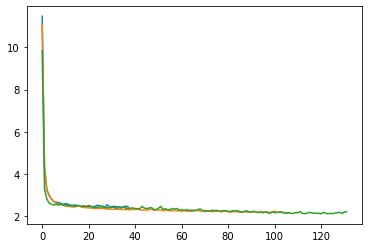

In [3]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

layers = [5,15,50]
scores = []
loss = []
rmse = []

for layer in layers:
    regr = MLPRegressor(hidden_layer_sizes = layer, activation = 'tanh', solver = 'sgd',\
                    learning_rate='constant', random_state=42, batch_size= 20,\
                    learning_rate_init = 0.005).fit(X_train, y_train)
    x_predict = regr.predict(X_test)
    scores.append(regr.score(X_test, y_test))
    loss.append(regr.loss_)
    rmse.append(np.sqrt(mean_squared_error(x_predict, y_test)))
    loss_curve = np.zeros(len(regr.loss_curve_))
    loss_curve = regr.loss_curve_
    loss_curve = np.sqrt(loss_curve)
    plt.plot(loss_curve)
    
print('The RMSE scores for layers 5, 15 and 20 are', np.sqrt(rmse), 'respectively.')
print('')
print('The model with 15 hidden layers performed the best, with an R-squared of {}, a loss of {}, and a RMSE of {}'\
      .format(scores[1],loss[1],np.sqrt(rmse[1])))

3) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size.

activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
Plot three different figures for the three batch size, where X-axis is epoch number and Y-axis is squared root of loss_curve_:

(a) batch_size = 1

(b) batch_size = 20

(c) batch_size = 2000

Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.

The best model used a batch size of 20, which resulted in an R squared of 0.673836575930974, a loss of 4.656717159280385, and a RMSE of 2.1334729184185184


/Users/joeniehaus/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


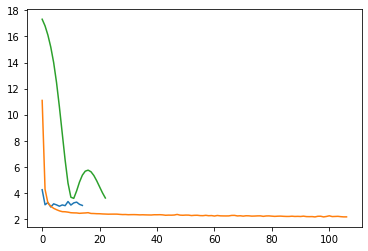

In [4]:
batch_size = [1,20,2000]
scores = []
loss = []
rmse = []

for batch in batch_size:
    regr = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd',\
                    learning_rate='constant', random_state=42, batch_size= batch,\
                    learning_rate_init = 0.005).fit(X_train, y_train)
    x_predict = regr.predict(X_test)
    scores.append(regr.score(X_test, y_test))
    loss.append(regr.loss_)
    rmse.append(np.sqrt(mean_squared_error(x_predict, y_test)))
    loss_curve = np.zeros(len(regr.loss_curve_))
    loss_curve = regr.loss_curve_
    loss_curve = np.sqrt(loss_curve)
    plt.plot(loss_curve)
    
print('The best model used a batch size of 20, which resulted in an R squared of {}, a loss of {}, and a RMSE of {}'\
      .format(scores[1],loss[1],np.sqrt(rmse[1])))

#### Batch size differences
When batch size = 1, we encounter more variability. This is because the loss curve is not permitted to learn continuously, instead recalculating at randomly selected points. A batch size of 20 displays the most stable decrease in loss, which can be expected with this number of layers. For these 3 options, it has enough size to continually improve while not overcompensating with an overly large batch size. This can be seen when too large of a batch size (like 2000, shown) gets caught up and is unable to meaningfully improve the loss curve in 15 layers.

# Tensor Playground
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.
#### Tanh: 
Test loss: 0.195
Training loss: 0.183

#### Linear:
Test loss: 0.501
Training loss: 0.500

Naturally, the linear decision boundary is a less effective activation function. It creates a near-vertical linear boundary, which given this dataset can only achieve about 50% accuracy. In comparison, tanh has effectively carved out a diagonal valley between the negative datapoints, correctly predicting all of the positive and negative data in the corners of the output layer and only incorrectly predicting a handful of negative datapoints in the center. The tanh function allows for non-linear groupings of data.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

#### 4 neurons: 
Test loss: 0.066
Training loss: 0.050

#### 8 neurons:
Test loss: 0.019
Training loss: 0.008

As the number of neurons increases, the decision boundary becomes much more hourglass shaped. Areas for two of the clusters of data are completely separated from one another, allowing for near perfect train loss. On the other hand, fewer neurons often result in more of a grey-area in the center of the output layer between the data. In these instances, more neurons give the network additional patterns to match to the data and select which connections to pursue. 

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

#### 100 epochs
##### Learning Rate 10
Test loss: 0.488
Training loss: 0.541
##### Learning Rate 0.1
Test loss: 0.013
Training loss: 0.012
##### Learning Rate 0.01
Test loss: 0.103
Training loss: 0.105
##### Learning Rate 0.001
Test loss: 0.463
Training loss: 0.449


#### 1000 epochs
##### Learning Rate 10
Test loss: 0.448
Training loss: 0.541
##### Learning Rate 0.1
Test loss: 0.001
Training loss: 0.001
##### Learning Rate 0.01
Test loss: 0.015
Training loss: 0.010
##### Learning Rate 0.001
Test loss: 0.313
Training loss: 0.320

For learning rate 10, the loss curve spikes once or twice early and then starting around 100 epochs, does not improve any further. 
For learning rate 0.1, the loss curve drops very quickly and asymptotically approaches 0 with no percieved momentary increases in loss. 
For learning rate 0.01, the loss curve has a much shallower descent towards 0, but similarly approaces 0. It is not as effective as learning rate 0.1.
For learning rate 0.01, the loss curve initially has a near-linear, shallow descent, which begins to resemble the curves in rates 0.1 and 0.01 only after a few hundred epochs. Again this was not as accurate as learning curves 0.1 or 0.01, but better than learning rate 10.
This makes sense, as a learning rate of 10 caused the training process to adjust the weights too quickly, resulting in a never-improving sub-optimal set of weights. As we decreased the learning rate, the momentum of the learning process slowed, allowing our network to train near-perfect rates in a short amount of time. Decreasing our learning rate further, however, slowed our training process to an extent that they could not reach the correct rates quickly enough in either the 100 or 1000 epoch tests.

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

Easily, the best test loss that I could achieve was by including the product of X1 and X2 (X1X2) in the input features. In fact, it appears that this network works even better when selecting this as the sole input, and reducing the neurons in the hidden layer to 1. Removing the hidden layers all together requires additional epochs, while adding additional hidden layers does not have much effect. Adding noise naturally creates a challenge for the network, though anything under a noise level of 20 allows a test loss of <0.05, regardless of the number of neurons. All activation functions yield the same results. Our network of course is only this effective on the dataset that we have selected, as it matches our input features almost perfectly. A learning rate of 1 appears to be the most effective.

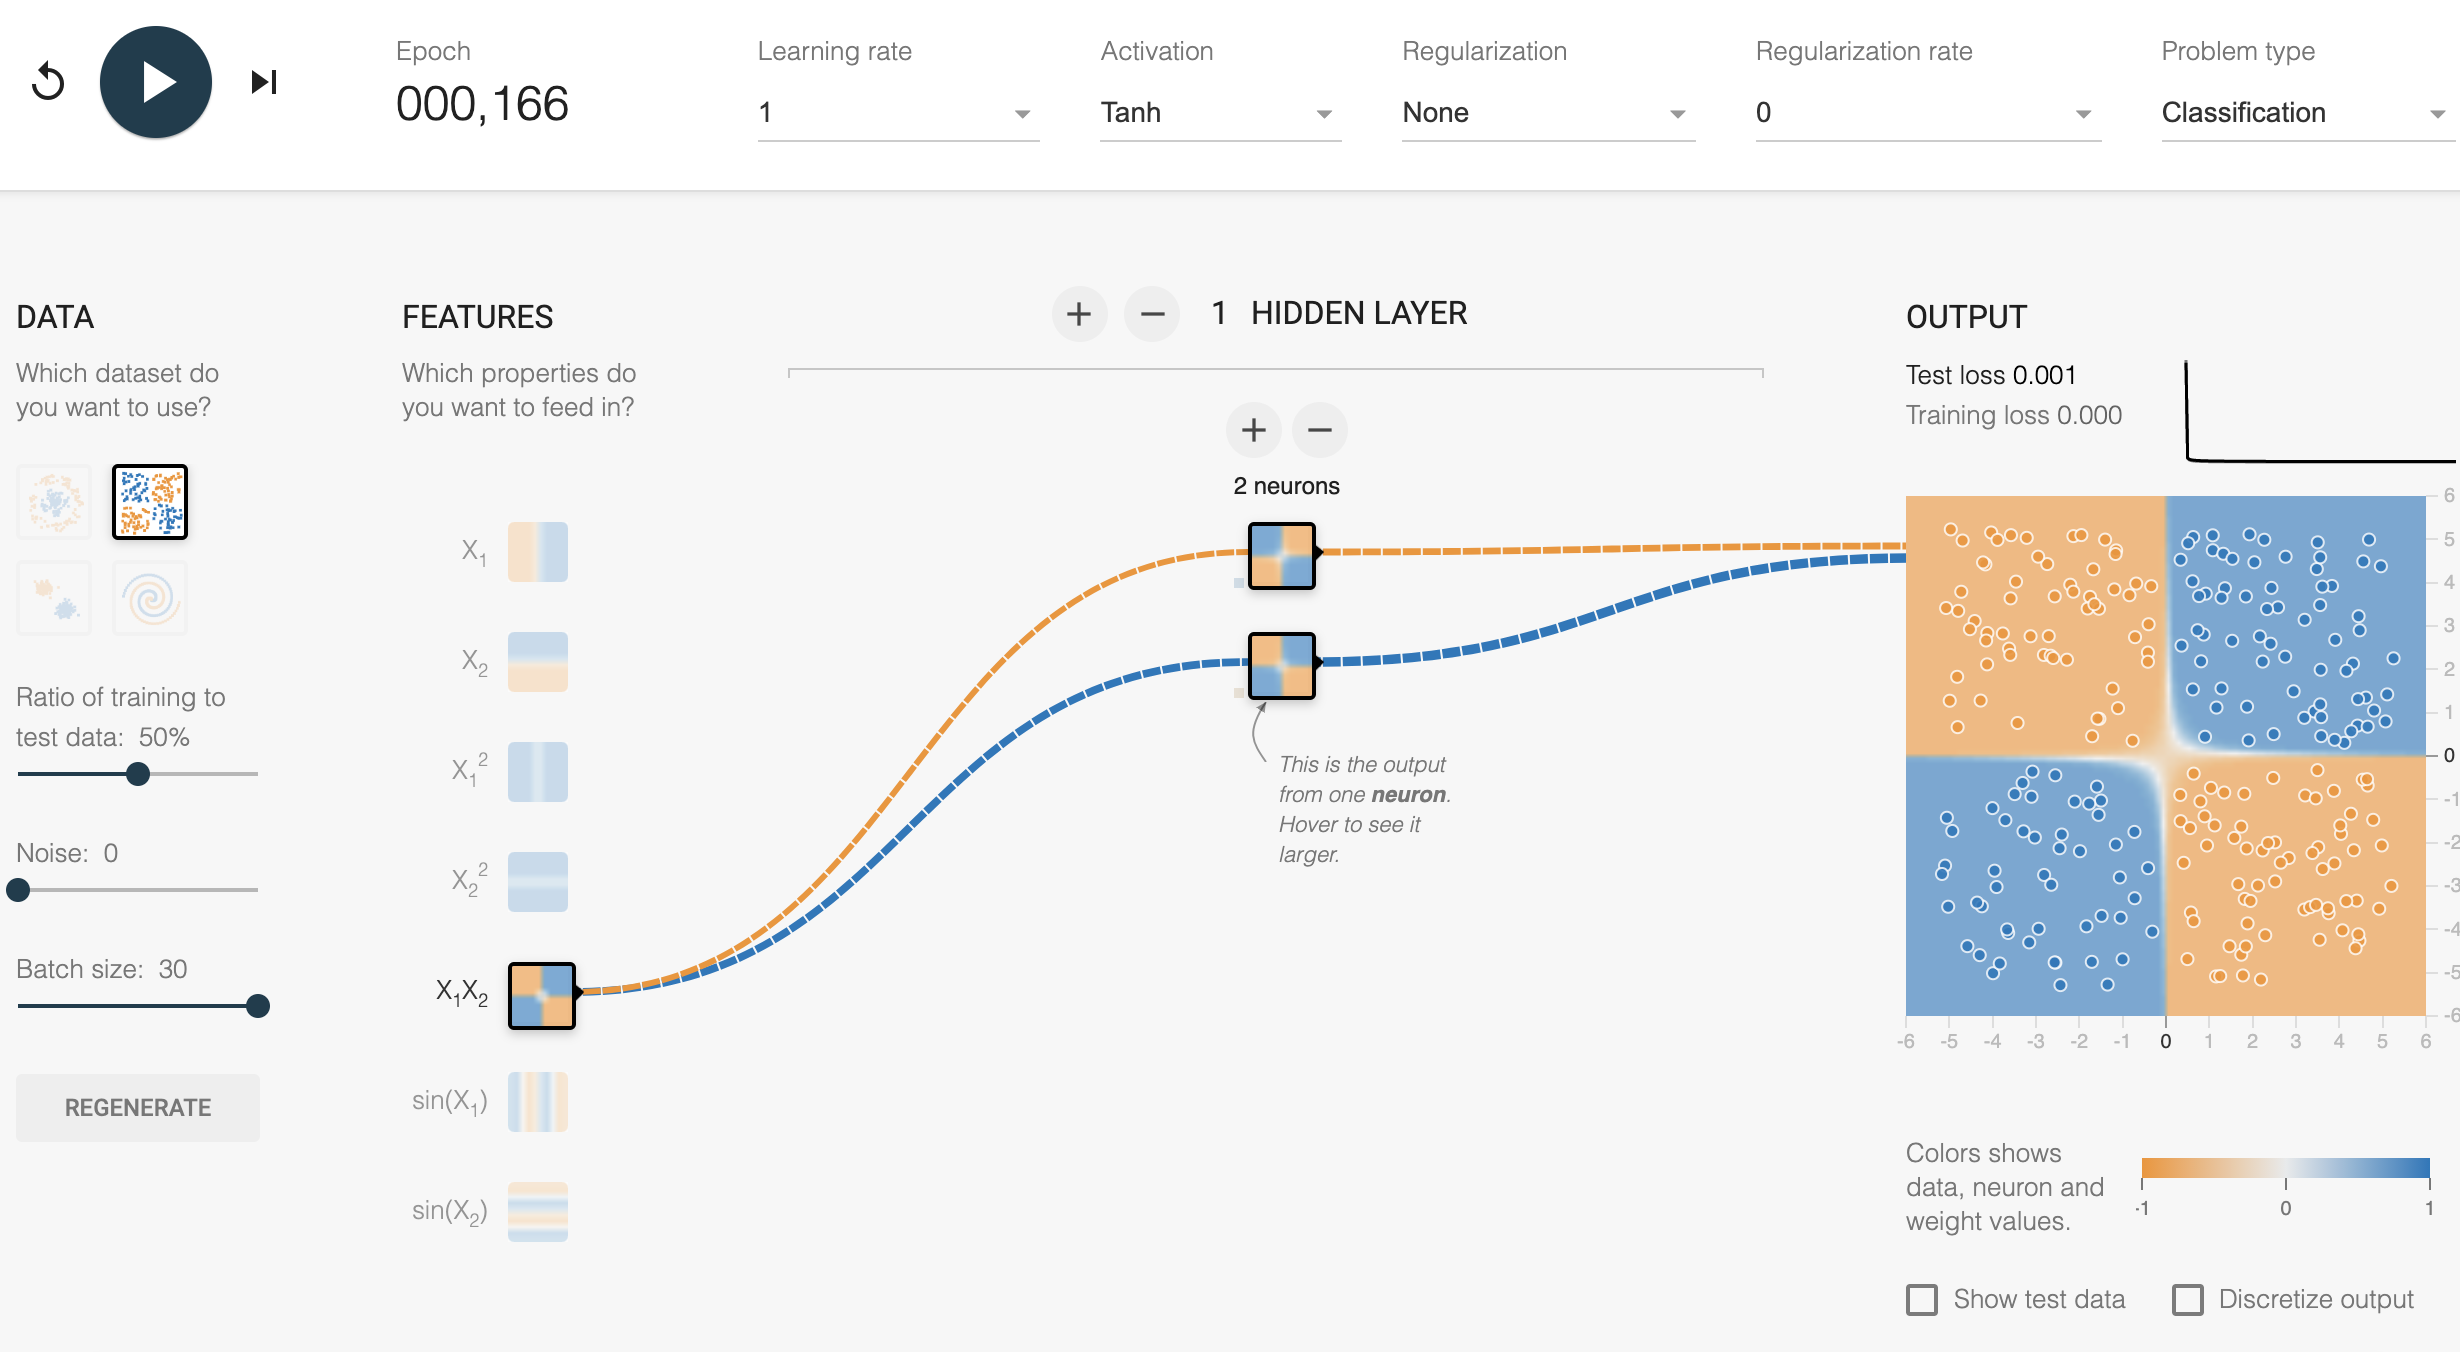

In [5]:
from IPython.display import Image
Image(filename = "Tensor Playground.png", width = 600, height = 300)

# Feature Selection

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

So, you will need to group the categories in class_type into two values,

{1,2,3,4,5} -> 1

{6,7} -> 0

Use this as a the target variable, and compute correlation to the 2 meta-classes. This change is to be made only for finding the correlation matrix and top 5 most positively and negatively correlated features with class_type. For the rest of Q3, please continue to use the original dataset.

In [6]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

class_df = pd.read_csv("class.csv")

In [7]:
class_df.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

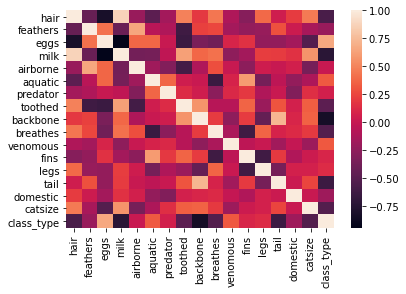

In [8]:
import warnings
warnings.filterwarnings('ignore')

feature_matrix = df.corr()

import seaborn as sns
sns.heatmap(feature_matrix)
plt.show()

In [9]:
print('3.1: positive correlation')
print(feature_matrix['class_type'].sort_values(ascending=False)[1:6])
print('')
print('3.2: negative correlation')
print(feature_matrix['class_type'].sort_values(ascending=True)[:5])

3.1: positive correlation
eggs        0.661825
aquatic     0.326639
venomous    0.321476
legs        0.131693
fins        0.099430
Name: class_type, dtype: float64

3.2: negative correlation
backbone   -0.828845
milk       -0.723683
tail       -0.631830
hair       -0.562384
catsize    -0.521030
Name: class_type, dtype: float64


3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000, random_state=50)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.ranking_

cols = list(X)
idx = selector.ranking_
top = [cols[i] for i in list(dict.fromkeys(idx))][0:5]

print('3.3. Top 5 features:', top)

3.3. Top 5 features: ['eggs', 'feathers', 'predator', 'aquatic', 'toothed']


4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below

    MLPRegressor(max_iter = 1000,random_state=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=50)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(x_train[['eggs','aquatic','venomous','legs','fins']])
X_test = X_scaler.transform(x_test[['eggs','aquatic','venomous','legs','fins']])
X_train

regr = MLPRegressor(max_iter=1000,random_state=1).fit(X_train, y_train)

x_predict = regr.predict(X_test)
r2_score = regr.score(X_test,y_test)
print('4a:',r2_score)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(x_train[['backbone','milk','tail','hair','catsize']])
X_test = X_scaler.transform(x_test[['backbone','milk','tail','hair','catsize']])
X_train

regr = MLPRegressor(max_iter=1000,random_state=1).fit(X_train, y_train)

x_predict = regr.predict(X_test)
r2_score = regr.score(X_test,y_test)
print('4b:',r2_score)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(x_train[['eggs','feathers','predator','aquatic','toothed']])
X_test = X_scaler.transform(x_test[['eggs','feathers','predator','aquatic','toothed']])
X_train

regr = MLPRegressor(max_iter=1000,random_state=1).fit(X_train, y_train)

x_predict = regr.predict(X_test)
r2_score = regr.score(X_test,y_test)
print('4c:',r2_score)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(x_train)
X_test = X_scaler.transform(x_test)

regr = MLPRegressor(max_iter=1000,random_state=1).fit(X_train, y_train)

x_predict = regr.predict(X_test)
r2_score = regr.score(X_test,y_test)
print('4d:',r2_score)

4a: 0.6895112688851421
4b: 0.8346085417665577
4c: 0.9519729843107427
4d: 0.9690391877029567


5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  

Because the negatively correlated traits had higher absolute levels of correlation, it makes sense that the R2 score is meaningfully higher for 4b than for 4a. Furthermore, because the traits chosen in 4c were selected through regression, as opposed to through correlation, these features will naturally also provide a higher R2, with a regression on all available variables providing the highest R2 of any method.

# Data Pre-processing
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [12]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


4.1 Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [13]:
print(df.isna().sum())

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64


In [14]:
df['yr_renovated'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


4.2 Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [15]:
df_dm = df.copy()
df_dm['binned_yr_built'] = pd.cut(df['yr_built'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                                  labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                  include_lowest = True)

In [16]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown='ignore')
onehot_df = pd.DataFrame(onehot.fit_transform(df_dm[['binned_yr_built']]).toarray())
df_dm = df_dm.join(onehot_df)
df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,price,binned_yr_built,0,1,2,3,4,5
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,...,1955,98178.0,221900.0,1940-1960,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,...,1991,98125.0,538000.0,1940-1960,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,...,1933,NaN,180000.0,1920-1940,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,...,1965,NaN,604000.0,1960-1980,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,...,1987,98074.0,510000.0,1980-2000,0.0,0.0,0.0,0.0,1.0,0.0


4.3 Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [17]:
temp_df = df.copy()
temp_df = temp_df.dropna()
temp_df.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
price            0
dtype: int64

In [18]:
from sklearn import linear_model
from sklearn.metrics import r2_score

X = temp_df.drop('price', axis=1)
y = temp_df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

mlr = linear_model.LinearRegression()

mlr.fit(x_train,y_train)

y_predict = mlr.predict(x_test)
r_score = r2_score(y_test,y_predict)
print('Regression with dropped values:', r_score)

Regression with dropped values: 0.6683819021913802


4.4 Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a linear regression model. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [19]:
from sklearn.impute import SimpleImputer

X = df.drop('price', axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=X.columns)

imputer.fit(x_train)
x_test = pd.DataFrame(imputer.transform(x_test), columns=X.columns)
x_test.head(20)

mlr.fit(x_train,y_train)

r_score = r2_score(y_test,mlr.predict(x_test))
print('Mean Impute:',r_score)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=X.columns)

imputer.fit(x_train)
x_test = pd.DataFrame(imputer.transform(x_test), columns=X.columns)
x_test.head(20)

mlr.fit(x_train,y_train)

r_score = r2_score(y_test,mlr.predict(x_test))
print('Median Impute:',r_score)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=X.columns)

imputer.fit(x_train)
x_test = pd.DataFrame(imputer.transform(x_test), columns=X.columns)
x_test.head(20)

mlr.fit(x_train,y_train)

r_score = r2_score(y_test,mlr.predict(x_test))
print('Most Frequent Impute:',r_score)

Mean Impute: 0.6285533082300779
Median Impute: 0.6229831308641933
Most Frequent Impute: 0.6180421246582128


In [20]:
from sklearn.impute import KNNImputer

neighbors = [2,5,10,20]

r_scores = []

for n in neighbors:
    X = df.drop('price', axis=1)
    y = df['price']

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    
    imputer = KNNImputer(n_neighbors=n)
    x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=X.columns)
    
    imputer.fit(x_train)
    x_test = pd.DataFrame(imputer.transform(x_test), columns=X.columns)

    mlr.fit(x_train,y_train)

    y_predict = mlr.predict(x_test)
    r_scores.append(r2_score(y_predict,y_test))
    
for i in range(len(r_scores)):
    print('KNNImputer with {} neighbors: {}'.format(neighbors[i],r_scores[i]))

KNNImputer with 2 neighbors: 0.4489326362031769
KNNImputer with 5 neighbors: 0.45618121459910377
KNNImputer with 10 neighbors: 0.45222804151046236
KNNImputer with 20 neighbors: 0.44768678527988237


The median imputed method provided the best result. It seems clear that SimpleImputer worked much better for our dataset than KNNImputer. There was no meaningful improvement across the number of neighbors for the KNNImputer.

4.5 In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

While dropping and/or imputing null values is many times acceptable or even unavoidable, each also introduces bias into your dataset. If our hold-out set relies on imputed values near the mean, for example, but contains values at the periphery that would have otherwise been dropped in our training set, the resulting r2 score may suffer. 

# Supplementary Notes
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (first 6 topics/lectures only, i.e. up to "gradient descent"). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 1, write 1A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

My favorite note was "Bias and Variance Dilemma & Shrinkage Methods" from Section A.

I prefered this selection because it was written well, and easily understandable. This supplement reinforced the idea that the bias-variance tradeoff is ubiquitous and that we cannot hope to avoid it - just to minimize its negative effects on our models. The supplement also speaks to the art vs science of the tradeoff. It is unwise to assume that two separate methodologies will have similar bias-variance tradeoffs, and therefore it is important to deeply understand the mechanics behind each method used.

I thought this note could be improved by introducing the connection between over- and under-fitting data and the bias-variance tradeoff. Our goal for the level of complexity in any model is to find the level of complexity that reduces total error (and thus, achieve a level of fit based on ideal levels of bias and variance). High bias and low variance can lead our model to be over-fit, while high-variance and low bias will cause underfitting. I find the below image to be helpful:

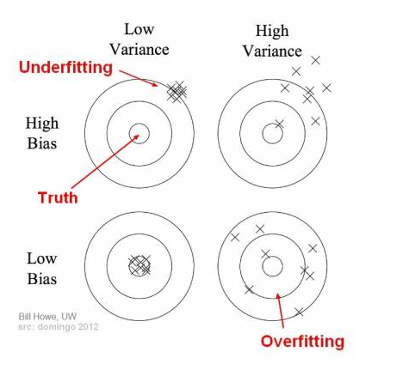

In [21]:
from IPython.display import Image
Image(filename = "BVT.png", width = 600, height = 300)